   ## KNN con CLS estratti dal longformer 

In [1]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Lettura del dataset, esso è composto da 107577 record da 770 dimensioni, 768 dimensioni (cls longformer) + colonna Text + colonna Category

In [2]:
df = pd.read_csv(os.getcwd()+"/dataset/dataset_classification.csv") 
#df = pd.read_csv(os.getcwd()+"/dataset/dataset_classification_bin_all.csv") # tutti i record anche quelle di train del bin 

### Suddivisione in train e test, salvaiamo le categarie in vettori seprarati dopo la split , infine togliamo le colonne Text e Category

In [4]:
train_knn , test_knn = train_test_split(df, test_size=0.2, random_state=42)
train_cat = train_knn["Categoria"]
test_cat = test_knn["Categoria"]
train_knn.drop('Categoria', axis=1, inplace=True)
test_knn.drop('Categoria', axis=1, inplace=True)
train_knn.drop('Text', axis=1, inplace=True)
test_knn.drop('Text', axis=1, inplace=True)

### Creazione KNN, impostazione del paramentro K e allenamento

In [5]:

knn_classifier = KNeighborsClassifier(n_neighbors=31)
knn_classifier.fit(train_knn, train_cat)


KNeighborsClassifier(n_neighbors=31)

## Chiamiamo la funzione predict del KNN sul test

In [6]:
predizioni = knn_classifier.predict(test_knn)

### Calcolo Metriche

In [7]:

print(accuracy_score(test_cat,predizioni))
print(precision_score(test_cat,predizioni, average='macro'))
print(recall_score(test_cat,predizioni, average='macro'))
print(f1_score(test_cat,predizioni, average='macro'))
print(confusion_matrix(test_cat,predizioni))


0.8912437255995538
0.8985943408909215
0.823507478423308
0.8506550951911687
[[4222    3  175   65  634]
 [   3  152   25    4   99]
 [ 197    7 4396  155  236]
 [  38    0   42 5036   96]
 [ 330    4  176   51 5370]]


### Matrice di confusione 

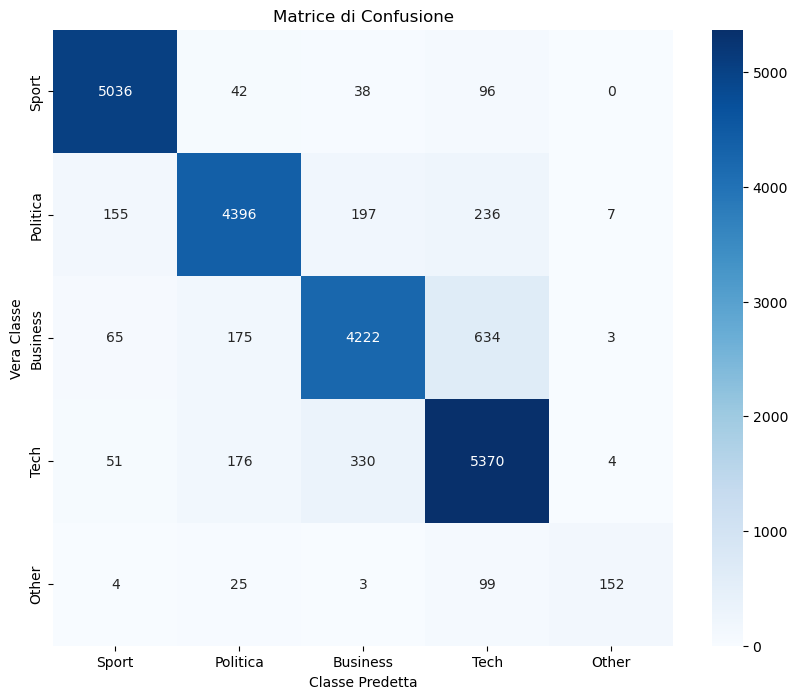

In [8]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
matrice_confusione = confusion_matrix(test_cat, predizioni, labels=['sport', 'politics', 'business', 'tech', 'other'])

classi = ['Sport', 'Politica', 'Business', 'Tech', 'Other']

plt.figure(figsize=(10, 8))
sns.heatmap(matrice_confusione, annot=True, fmt="d", cmap="Blues", xticklabels=classi, yticklabels=classi)

plt.title('Matrice di Confusione')
plt.ylabel('Vera Classe')
plt.xlabel('Classe Predetta')

plt.show()